In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2023-07-08 19:06:17.448178: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 19:06:17.571961: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 19:06:17.575592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 19:06:18.918918: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import numpy as np
# Create all-zero matrix of shape
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Vectorize training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [4]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers
# Model definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# Configuring the optimizer
from keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# Using custom losses and metrics
from keras import losses
from keras import metrics

model.compile(optimizer = RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [9]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
# Training model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5377 - acc: 0.7796 - val_loss: 0.4195 - val_acc: 0.8600
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3428 - acc: 0.8913 - val_loss: 0.3255 - val_acc: 0.8800
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2537 - acc: 0.9190 - val_loss: 0.3382 - val_acc: 0.8589
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2068 - acc: 0.9319 - val_loss: 0.2764 - val_acc: 0.8881
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1730 - acc: 0.9433 - val_loss: 0.2839 - val_acc: 0.8877
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1472 - acc: 0.9529 - val_loss: 0.2820 - val_acc: 0.8869
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1285 - acc: 0.9577 - val_loss: 0.2909 - val_acc: 0.8869
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1099 - a

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

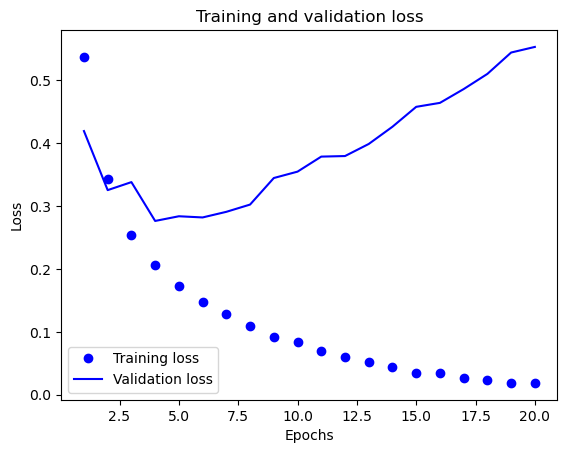

In [14]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

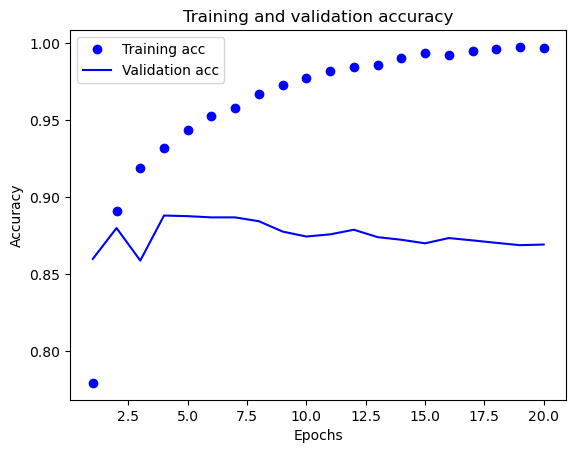

In [16]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4570 - accuracy: 0.8165
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2681 - accuracy: 0.9039
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2110 - accuracy: 0.9226
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2874 - accuracy: 0.8862


[0.28739219903945923, 0.8861600160598755]